## 主客体互倚模型（Actor-partner Interdependence model，APIM）

Kenny等人提出APIM用来处理对子数据（dyadic data，夫/妻，父母/子女，等等）

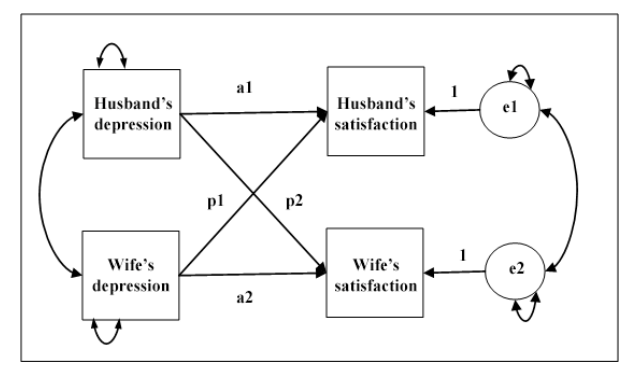

1、两种效应

主体效应：主体内部效应，例如，a1是丈夫抑郁对自己婚姻满意的影响

客体效应：主观题间的交叉效应，例如，p1是丈夫抑郁对妻子婚姻满意度的影响

如果我们认为丈夫的主体内效应和妻子的主体内效应是一样的，可以设置a1=a2，客体效应同理。

如果分开探讨，可以体现对子双方的角色差异（例如，妻子和章区主体效应和客体效应如何不同？）


In [ ]:
library("lavaan")

In [ ]:
# 载入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data3_6.csv")

#### 是否可分？这里就涉及了一个重要概念：可分对子（例如，异性夫妻）和不可分对子（例如，同性夫妻）

在数据下面数据中dyadic标记对子，id标记对子中具体角色“A”为老公，“B”为妻子

In [ ]:
head(BASE)

In [ ]:
# 把原始数据转化为以对子为单位的数据
BASE_wide <- cbind(
BASE[seq(1, nrow(BASE), 2),],
BASE[seq(2, nrow(BASE), 2),c("deperss","satisfaction")]
    )
BASE_wide

In [ ]:
colnames(BASE_wide) <- c("id","dyadic","Husband_dep","Husband_sat","Wife_dep","Wife_sat")

In [ ]:
# 定义模型
model.SPE <- 'Husband_sat ~ Husband_dep + Wife_dep 
              Wife_sat ~ Wife_dep + Husband_dep 
              Husband_sat ~~ Wife_sat' 


In [ ]:
# 估计模型
model.EST <- sem (model.SPE, data = BASE_wide) 


In [ ]:
# 提取模型拟合结果
summary (model.EST, standardized = TRUE)

输出三线表：

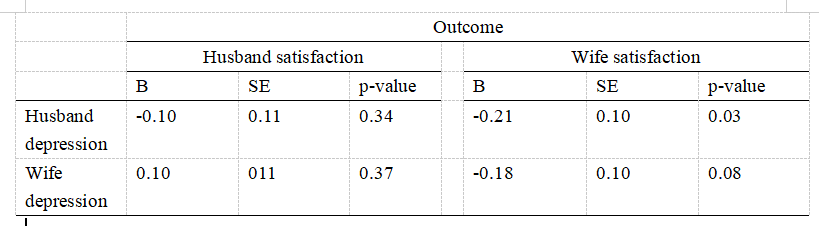

#### 对子之间的主客体效应是相同的吗？一方显著大于另一方面？

#### 例如，丈夫抑郁对妻子婚姻满意度的影响是否显著大于反之 

要回答这个问题，需要定义一个效应相等的模型，与原来模型比较，拟合显著恶化，说明原来更好

In [ ]:
# 定义模型
model.SPE2<- 'Husband_sat ~ a1*Husband_dep + p2*Wife_dep 
              Wife_sat ~ a2*Wife_dep + p1*Husband_dep 
              Husband_dep ~~ Wife_dep
              p1 == p2
' 

In [ ]:
model.EST2<- sem (model.SPE, data = BASE_wide)

In [ ]:
summary(model.EST2)

In [ ]:
anova(model.EST2,model.EST)